In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8580246913580247, Loss: 0.48131324626781324
Checkpoint 20, Accuracy: 0.8580246913580247, Loss: 0.4606286508065683
Checkpoint 30, Accuracy: 0.9197530864197531, Loss: 0.4306155663949472
Checkpoint 40, Accuracy: 0.9074074074074074, Loss: 0.41940332342077186
Checkpoint 50, Accuracy: 0.9320987654320988, Loss: 0.3513696105391891
Checkpoint 60, Accuracy: 0.9629629629629629, Loss: 0.27805872316713687
Checkpoint 70, Accuracy: 0.9506172839506173, Loss: 0.2549648991337529
Checkpoint 80, Accuracy: 0.9629629629629629, Loss: 0.2373946331165455
Checkpoint 90, Accuracy: 0.9567901234567902, Loss: 0.20884831746419272
Checkpoint 100, Accuracy: 0.9753086419753086, Loss: 0.16813212853890877
Checkpoint 110, Accuracy: 0.9629629629629629, Loss: 0.15953332406503182
Checkpoint 120, Accuracy: 0.9691358024691358, Loss: 0.13183586685745805
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.12288513890019169
Checkpoint 140, Accuracy: 0.9629629629629629, Loss: 0.12123039033677843
Checkp

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.99136144 0.00749325 0.00114532]
[1. 0. 0.] <-> [0.9904197  0.00362649 0.0059539 ]
[1. 0. 0.] <-> [0.834157   0.00882355 0.1570195 ]
[1. 0. 0.] <-> [0.994323   0.00248693 0.00319011]
[1. 0. 0.] <-> [0.98821354 0.00847919 0.00330723]
[1. 0. 0.] <-> [0.98938596 0.0026153  0.00799877]
[1. 0. 0.] <-> [0.9957775  0.00270698 0.00151548]
[0. 0. 1.] <-> [9.305462e-03 5.365052e-04 9.901580e-01]
[1. 0. 0.] <-> [0.99286145 0.00186327 0.00527523]
[0. 1. 0.] <-> [2.3385812e-02 9.7653461e-01 7.9587728e-05]
[1. 0. 0.] <-> [0.9763707  0.02237363 0.00125562]
[1. 0. 0.] <-> [0.98994714 0.0086416  0.00141132]
[1. 0. 0.] <-> [0.02543028 0.00130933 0.97326034]
[1. 0. 0.] <-> [0.98680323 0.01214328 0.00105345]
[1. 0. 0.] <-> [0.9905069  0.00765813 0.00183498]
[0. 1. 0.] <-> [0.48087016 0.51849216 0.00063767]
[1. 0. 0.] <-> [0.97392243 0.00425407 0.02182349]
[1. 0. 0.] <-> [0.99207836 0.00524481 0.00267682]
[0. 1. 0.] <-> [1.8908760e-02 9.8102427e-01 6.6959903e-05]
[1. 0. 0.] <-> [0.99193585

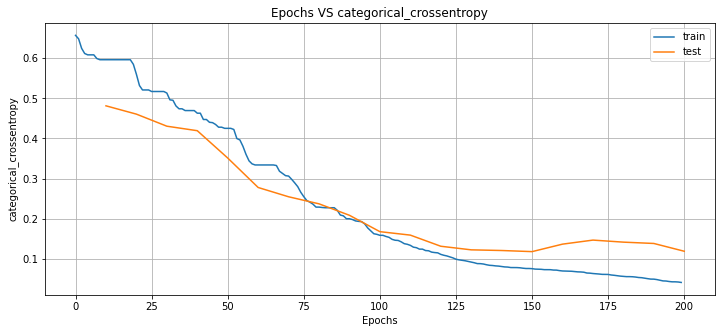

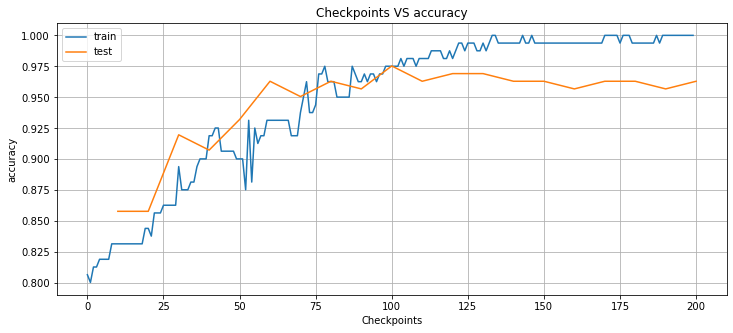

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 0.27514750545184075, 'categorical_crossentropy': 0.48131324626781324, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 16, 'tn_hit': 12, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 6, 'tn_hit': 87, 'fn_hit': 11}, 2: {'tp_hit': 1, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 12}}, 'checkpoint': 10} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 0.2609576897079063, 'categorical_crossentropy': 0.4606286508065683, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 16, 'tn_hit': 12, 'fn_hit': 0}, 1: {'tp_hit': 4, 'fp_hit': 6, 'tn_hit': 87, 'fn_hit': 11}, 2: {'tp_hit': 1, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 12}}, 'checkpoint': 20} 


{'accuracy': 0.9197530864197531, 'mean_square_error': 0.21633785363956082, 'categorical_crossentropy': 0.4306155663949472, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 7, 'tn_hit': 21, 'fn_hit': 2}, 1: {'tp_hit': 9, 'fp_hit': 4, 'tn_hit': 89, 'fn_hit': 6}, 2: {'tp_hit': 8, 'fp_hit': 2, 'tn_hit': 93, 'fn_

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 2.0496964 -3.        -2.2816467 -1.4305824  2.1735477]
 bias: 2.8615739345550537

Neuron 1: weights:
[-1.1381239   2.5638092   1.9616671  -0.10110926 -0.10142928]
 bias: -0.7088196873664856

Neuron 2: weights:
[-0.09538513 -3.         -1.2988914   1.7229749   3.        ]
 bias: -3.0

Neuron 3: weights:
[ 0.00880888  2.4697955  -1.7223527  -2.1974216  -2.696639  ]
 bias: 0.8602035641670227

$
Layer 2
Neuron 0: weights:
[ 3.        -1.6605814 -3.         3.       ]
 bias: -0.2539013624191284

Neuron 1: weights:
[-3.          3.         -1.7130612   0.39353916]
 bias: 1.5062062740325928

Neuron 2: weights:
[ 0.89538527 -3.          3.         -2.3929582 ]
 bias: 0.5466237664222717

$

